In [18]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow import keras

In [19]:
boston_data = datasets.load_boston()
X = boston_data["data"]
y = boston_data["target"]
print(X.shape, y.shape)

(506, 13) (506,)


In [12]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20,
                                                random_state = 1234, shuffle = True)
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)

(404, 13) (404,) (102, 13) (102,)


In [17]:
Xtrain

array([[4.07710e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.95240e+02, 2.14600e+01],
       [1.96091e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.34400e+01],
       [6.71772e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.20000e-01, 1.74400e+01],
       ...,
       [8.19900e-02, 0.00000e+00, 1.39200e+01, ..., 1.60000e+01,
        3.96900e+02, 1.04000e+01],
       [3.75780e-01, 0.00000e+00, 1.05900e+01, ..., 1.86000e+01,
        3.95240e+02, 2.39800e+01],
       [1.00000e-01, 3.40000e+01, 6.09000e+00, ..., 1.61000e+01,
        3.90430e+02, 4.86000e+00]])

In [4]:
print(Xtrain[0,])
print(Xtrain[1,])

[  0.40771   0.        6.2       1.        0.507     6.164    91.3
   3.048     8.      307.       17.4     395.24     21.46   ]
[ 19.6091   0.      18.1      0.       0.671    7.313   97.9      1.3163
  24.     666.      20.2    396.9     13.44  ]


In [5]:
lr_model = LinearRegression(fit_intercept = True)
lr_model.fit(Xtrain, ytrain)

print(lr_model.coef_, lr_model.intercept_)

[-1.02035256e-01  6.01151037e-02  3.47699609e-02  3.00350930e+00
 -2.04147071e+01  2.89371393e+00 -5.32341284e-03 -1.76260440e+00
  3.38923461e-01 -1.34787063e-02 -1.01921362e+00  1.03741454e-02
 -5.25691400e-01] 45.7371812289549


In [6]:
ytrain_hat = lr_model.predict(Xtrain)
print(mean_squared_error(ytrain, ytrain_hat))

21.927002660491915


In [7]:
ytest_hat = lr_model.predict(Xtest)
print(mean_squared_error(ytest, ytest_hat))

23.964571384956816


In [8]:
# STEP#1: conceptual network
nn_model = keras.models.Sequential([
    keras.layers.Input(shape = (Xtrain.shape[1],)),
    keras.layers.Dense(1)
])
nn_model.summary()

#nn_model2 = keras.models.Sequential()
#nn_model2.add(keras.layers.Input(shape = (Xtrain.shape[1],)))
#nn_model2.add(keras.layers.Dense(1))
#nn_model2.summary()

# STEP#2: compiled network
nn_model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.01),
                 loss = "mean_squared_error")

# STEP#3: learned network
nn_model.fit(Xtrain, ytrain,
             epochs = 20,
             batch_size = 16,
             verbose = 1)

nn_model.fit(Xtrain, ytrain,
             epochs = 20,
             batch_size = 16,
             verbose = 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


2022-07-30 13:03:58.013223: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


26/26 [==============================] - 0s 633us/step - loss: 3892.5520
Epoch 2/20
26/26 [==============================] - 0s 2ms/step - loss: 610.9474
Epoch 3/20
26/26 [==============================] - 0s 1ms/step - loss: 187.2745
Epoch 4/20
26/26 [==============================] - 0s 4ms/step - loss: 135.5695
Epoch 5/20
26/26 [==============================] - 0s 652us/step - loss: 113.3223
Epoch 6/20
26/26 [==============================] - 0s 601us/step - loss: 104.9324
Epoch 7/20
26/26 [==============================] - 0s 674us/step - loss: 93.1909
Epoch 8/20
26/26 [==============================] - 0s 589us/step - loss: 91.2309
Epoch 9/20
26/26 [==============================] - 0s 602us/step - loss: 80.8794
Epoch 10/20
26/26 [==============================] - 0s 614us/step - loss: 82.1869
Epoch 11/20
26/26 [==============================] - 0s 585us/step - loss: 81.0007
Epoch 12/20
26/26 [==============================] - 0s 566us/step - loss: 70.1357
Epoch 13/20
26/26 [====

In [9]:
ytrain_hat = nn_model.predict(Xtrain)
print(mean_squared_error(ytrain, ytrain_hat))
ytest_hat = nn_model.predict(Xtest)
print(mean_squared_error(ytest, ytest_hat))

36.90533554021811
47.34686369027076


In [10]:

nn_model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 1) dtype=float32, numpy=
 array([[-0.01611066],
        [ 0.10215632],
        [-0.01008552],
        [ 2.082921  ],
        [ 0.5591252 ],
        [ 1.4728663 ],
        [ 0.08626236],
        [-0.06467967],
        [-0.02576907],
        [ 0.00249022],
        [ 0.20705445],
        [ 0.02936281],
        [-0.7088802 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.8892923], dtype=float32)>]

In [11]:
mlp_model = keras.models.Sequential([
    keras.layers.Dense(32, activation = "relu", input_shape = (Xtrain.shape[1],)),
    keras.layers.Dense(1)
])
mlp_model.summary()

mlp_model2 = keras.models.Sequential([
    keras.layers.Input(shape = (Xtrain.shape[1],)),
    keras.layers.Dense(32, activation = "relu"),
    keras.layers.Dense(1)
])
mlp_model2.summary()

mlp_model3 = keras.models.Sequential([
    keras.layers.Input(shape = (Xtrain.shape[1],)),
    keras.layers.Dense(32),
    keras.layers.Activation("relu"),
    keras.layers.Dense(1)
])
mlp_model3.summary()

# x: 13 => z: 32 => y_hat: 1
# number of connections from x to z = (13 + 1) x 32
# number of connections from z to y_hat = (33 + 1) x 1

mlp_model.compile(loss = "mean_squared_error",
                  optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
                  metrics = ["mae"])

mlp_history = mlp_model.fit(Xtrain, ytrain,
                            epochs = 200,
                            batch_size = 16,
                            verbose = 1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                448       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                448       
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 481
Trainable params

26/26 [==============================] - 0s 644us/step - loss: 40.0824 - mae: 4.4612
Epoch 145/200
26/26 [==============================] - 0s 693us/step - loss: 40.5612 - mae: 4.5322
Epoch 146/200
26/26 [==============================] - 0s 644us/step - loss: 39.7359 - mae: 4.5342
Epoch 147/200
26/26 [==============================] - 0s 711us/step - loss: 39.8573 - mae: 4.5570
Epoch 148/200
26/26 [==============================] - 0s 701us/step - loss: 39.5298 - mae: 4.5693
Epoch 149/200
26/26 [==============================] - 0s 717us/step - loss: 39.2452 - mae: 4.4754
Epoch 150/200
26/26 [==============================] - 0s 717us/step - loss: 39.1514 - mae: 4.3823
Epoch 151/200
26/26 [==============================] - 0s 669us/step - loss: 39.1735 - mae: 4.5177
Epoch 152/200
26/26 [==============================] - 0s 699us/step - loss: 38.8784 - mae: 4.4618
Epoch 153/200
26/26 [==============================] - 0s 707us/step - loss: 38.8769 - mae: 4.3563
Epoch 154/200
26/26 [===

In [12]:
ytrain_hat = mlp_model.predict(Xtrain)
print(mean_squared_error(ytrain, ytrain_hat))
ytest_hat = mlp_model.predict(Xtest)
print(mean_squared_error(ytest, ytest_hat))

34.30513546375395
41.49472849143512


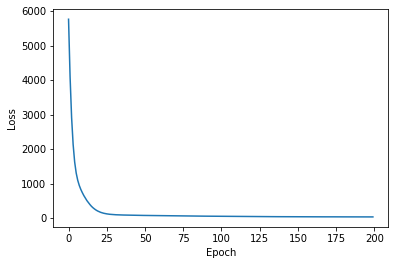

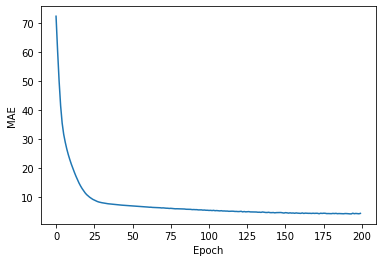

In [13]:
import matplotlib.pyplot as plt

plt.plot(mlp_history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.plot(mlp_history.history["mae"])
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.show()

In [14]:
Xlearn, Xvalidation, ylearn, yvalidation = train_test_split(Xtrain, ytrain, test_size = 0.25,
                                                            random_state = 1234, shuffle = True)
print(Xlearn.shape, ylearn.shape, Xvalidation.shape, yvalidation.shape)

mlp_model = keras.models.Sequential([
    keras.layers.Dense(32, activation = "relu", input_shape = (Xtrain.shape[1],)),
    keras.layers.Dense(1)
])
mlp_model.summary()

mlp_model.compile(loss = "mean_squared_error",
                  optimizer = keras.optimizers.Adam(learning_rate = 0.02),
                  metrics = ["mae"])

mlp_history = mlp_model.fit(Xlearn, ylearn,
                            epochs = 200,
                            batch_size = 16,
                            verbose = 0, 
                            validation_data = (Xvalidation, yvalidation))

(303, 13) (303,) (101, 13) (101,)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                448       
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


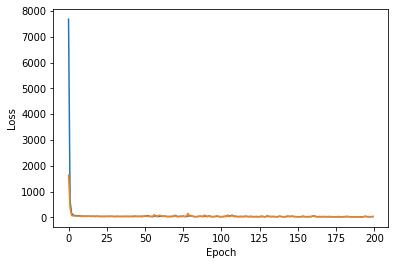

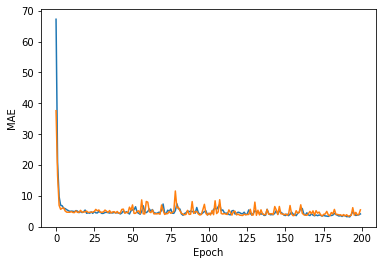

In [15]:
plt.plot(mlp_history.history["loss"])
plt.plot(mlp_history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
plt.plot(mlp_history.history["mae"])
plt.plot(mlp_history.history["val_mae"])
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.show()

In [16]:
Xlearn, Xvalidation, ylearn, yvalidation = train_test_split(Xtrain, ytrain, test_size = 0.25,
                                                            random_state = 1234, shuffle = True)
print(Xlearn.shape, ylearn.shape, Xvalidation.shape, yvalidation.shape)

# to reduce the risk of overfitting we stop the algorithm if the validation performance
# does not improve in "patience" successive iterations
early_stopping1 = keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                               patience = 10, restore_best_weights = True)
early_stopping2 = keras.callbacks.EarlyStopping(monitor = "val_mae", 
                                               patience = 10, restore_best_weights = True)

mlp_model = keras.models.Sequential([
    keras.layers.Dense(32, name = "hidden", activation = "relu", input_shape = (Xtrain.shape[1],)),
    keras.layers.Dense(1, name = "output")
])
mlp_model.summary()

mlp_model.compile(loss = "mean_squared_error",
                  optimizer = keras.optimizers.Adam(learning_rate = 0.02),
                  metrics = ["mae"])

mlp_history = mlp_model.fit(Xlearn, ylearn,
                            epochs = 200,
                            batch_size = 16,
                            verbose = 1, 
                            callbacks = [early_stopping1, early_stopping2],
                            validation_data = (Xvalidation, yvalidation))

(303, 13) (303,) (101, 13) (101,)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 32)                448       
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
19/19 [==============================] - 0s 5ms/step - loss: 3492.2488 - mae: 45.2964 - val_loss: 255.8617 - val_mae: 14.4936
Epoch 2/200
19/19 [==============================] - 0s 2ms/step - loss: 430.4212 - mae: 17.2219 - val_loss: 262.5926 - val_mae: 13.6436
Epoch 3/200
19/19 [==============================] - 0s 2ms/step - loss: 136.8105 - mae: 8.9877 - val_loss: 62.2755 - val_mae: 5.2431
Epoch 4/2

In [17]:
#mlp_model.layers[0].weights
type(mlp_model.layers)

#mlp_model.layers[1]

#mlp_model.layers[0].trainable = False

list

In [18]:
print(mlp_model.weights[0].numpy().shape)

(13, 32)


In [19]:
Xlearn, Xvalidation, ylearn, yvalidation = train_test_split(Xtrain, ytrain, test_size = 0.25,
                                                            random_state = 1234, shuffle = True)
print(Xlearn.shape, ylearn.shape, Xvalidation.shape, yvalidation.shape)

mlp_model = keras.models.Sequential([
    keras.layers.Dense(32, name = "hidden", activation = "relu", input_shape = (Xtrain.shape[1],)),
    keras.layers.Dense(1, name = "output")
])
mlp_model.summary()

mlp_model.compile(loss = "mean_squared_error",
                  optimizer = keras.optimizers.Adam(learning_rate = 0.02),
                  metrics = ["mae"])

mlp_history = mlp_model.fit(Xlearn, ylearn,
                            epochs = 200,
                            batch_size = 16,
                            verbose = 0, 
                            validation_data = (Xvalidation, yvalidation))

(303, 13) (303,) (101, 13) (101,)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 32)                448       
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


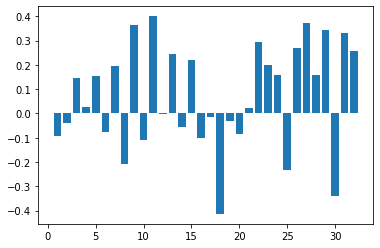

In [20]:
import numpy as np
plt.bar(np.arange(1, 33), mlp_model.layers[1].weights[0].numpy()[:,0])
plt.show()

In [21]:
Xlearn, Xvalidation, ylearn, yvalidation = train_test_split(Xtrain, ytrain, test_size = 0.25,
                                                            random_state = 1234, shuffle = True)
print(Xlearn.shape, ylearn.shape, Xvalidation.shape, yvalidation.shape)

mlp_model = keras.models.Sequential([
    keras.layers.Dense(32, name = "hidden", activation = "relu", input_shape = (Xtrain.shape[1],)),
    keras.layers.Dense(1, name = "output", kernel_regularizer = keras.regularizers.l2(l2 = 0.1))
])
mlp_model.summary()

mlp_model.compile(loss = "mean_squared_error",
                  optimizer = keras.optimizers.Adam(learning_rate = 0.02),
                  metrics = ["mae"])

mlp_history = mlp_model.fit(Xlearn, ylearn,
                            epochs = 200,
                            batch_size = 16,
                            verbose = 0, 
                            validation_data = (Xvalidation, yvalidation))

(303, 13) (303,) (101, 13) (101,)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 32)                448       
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


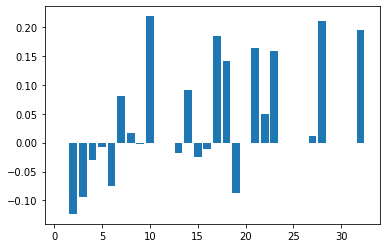

[[ 3.11253455e-36]
 [-1.23310454e-01]
 [-9.44200978e-02]
 [-3.04715745e-02]
 [-7.18476484e-03]
 [-7.55487233e-02]
 [ 8.08135197e-02]
 [ 1.59866977e-02]
 [-2.06451654e-03]
 [ 2.18760848e-01]
 [-1.38800025e-36]
 [-1.55100180e-36]
 [-1.75331309e-02]
 [ 9.11650732e-02]
 [-2.46487428e-02]
 [-1.17890835e-02]
 [ 1.84577957e-01]
 [ 1.41299218e-01]
 [-8.63167048e-02]
 [-1.00797493e-36]
 [ 1.64209858e-01]
 [ 4.98305410e-02]
 [ 1.59305394e-01]
 [ 1.27282204e-37]
 [-4.69597348e-04]
 [ 3.73191475e-37]
 [ 1.20331896e-02]
 [ 2.11251423e-01]
 [-3.00445278e-36]
 [ 3.32431438e-36]
 [-1.28688507e-36]
 [ 1.94382355e-01]]


In [22]:
import numpy as np
plt.bar(np.arange(1, 33), mlp_model.layers[1].weights[0].numpy()[:,0])
plt.show()
print(mlp_model.layers[1].weights[0].numpy())

In [23]:
Xlearn, Xvalidation, ylearn, yvalidation = train_test_split(Xtrain, ytrain, test_size = 0.25,
                                                            random_state = 1234, shuffle = True)
print(Xlearn.shape, ylearn.shape, Xvalidation.shape, yvalidation.shape)

mlp_model = keras.models.Sequential([
    keras.layers.Dense(32, name = "hidden", activation = "relu", input_shape = (Xtrain.shape[1],)),
    keras.layers.Dense(1, name = "output", kernel_regularizer = keras.regularizers.l1(l1 = 0.1),
                      kernel_constraint = keras.constraints.non_neg())
])
mlp_model.summary()

mlp_model.compile(loss = "mean_squared_error",
                  optimizer = keras.optimizers.Adam(learning_rate = 0.02),
                  metrics = ["mae"])

mlp_history = mlp_model.fit(Xlearn, ylearn,
                            epochs = 200,
                            batch_size = 16,
                            verbose = 0, 
                            validation_data = (Xvalidation, yvalidation))

(303, 13) (303,) (101, 13) (101,)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 32)                448       
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


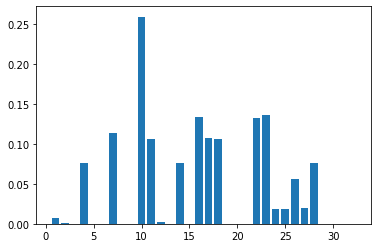

[[ 0.00685692]
 [ 0.00081649]
 [-0.        ]
 [ 0.07582276]
 [-0.        ]
 [-0.        ]
 [ 0.11360185]
 [-0.        ]
 [-0.        ]
 [ 0.25934884]
 [ 0.10622808]
 [ 0.00162815]
 [-0.        ]
 [ 0.07644089]
 [-0.        ]
 [ 0.13384748]
 [ 0.10765698]
 [ 0.10644317]
 [-0.        ]
 [-0.        ]
 [-0.        ]
 [ 0.13286006]
 [ 0.13574758]
 [ 0.01903326]
 [ 0.01794676]
 [ 0.0564085 ]
 [ 0.01942549]
 [ 0.07591041]
 [-0.        ]
 [-0.        ]
 [-0.        ]
 [-0.        ]]


In [24]:
import numpy as np
plt.bar(np.arange(1, 33), mlp_model.layers[1].weights[0].numpy()[:,0])
plt.show()
print(mlp_model.layers[1].weights[0].numpy())